In [3]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

import os
import json

from scipy.stats import linregress
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

## Load Data

In [2]:
entity_richness_df = pd.read_csv(
    "../../data/wikidata/wikipedia-entity-richness-10k-samples.csv"
)

In [27]:
entity_richness_df

,code,lang,average_words,average_total_entities,average_unique_entities,average_total_target_entities,average_unique_target_entities,language_script,language_family,LLama_score
0,ca:,Catalan,386.4352,26.5070,19.5319,3.8204,2.3064,Latin,Romance,84.01
1,da:,Danish,255.7695,22.7107,16.8970,3.2939,2.0761,Latin,Germanic,81.79
2,de:,German,418.5911,40.9469,30.4609,3.9036,2.4097,Latin,Germanic,85.74
3,en:,English,463.1478,70.1181,50.1902,6.8614,3.6812,latin,Germanic,89.40
4,es:,Spanish,470.5506,33.0414,23.8025,4.2502,2.4056,Latin,Romance,81.74
5,fr:,French,491.9274,36.8189,26.2652,4.4849,2.5791,Latin,Romance,84.18
6,hr:,Croatian,273.2872,24.9753,19.6839,0.8701,0.5975,Latin,Slavic,76.69
7,it:,Italian,391.6706,31.0902,21.5230,3.9515,2.2414,Latin,Romance,84.39
8,nl:,Dutch,156.5349,25.2445,19.7739,1.8523,1.2847,Latin,Germanic,85.35
9,pl:,Polish,214.2879,32.7062,25.7368,0.8957,0.5988,Latin,Slavic,77.50


## Check relationship between score and stats from wikipedia sampling

In [4]:
entity_richness_df["average_words"].corr(entity_richness_df["LLama_score"])

0.14916100054162695

In [5]:
entity_richness_df["average_total_entities"].corr(entity_richness_df["LLama_score"])

0.2968840398609711

In [7]:
entity_richness_df["average_unique_entities"].corr(entity_richness_df["LLama_score"])

0.2578993602132841

In [6]:
entity_richness_df["average_total_target_entities"].corr(
    entity_richness_df["LLama_score"]
)

0.7423438496782907

In [8]:
entity_richness_df["average_unique_target_entities"].corr(
    entity_richness_df["LLama_score"]
)

0.7771119983978775

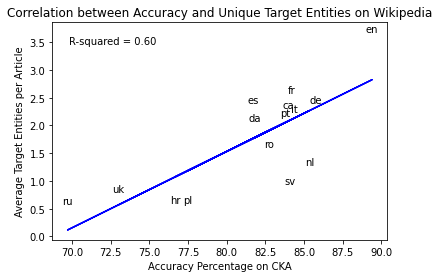

In [17]:
# create the graph

plt.title("Correlation between Accuracy and Unique Target Entities on Wikipedia")
plt.scatter(
    entity_richness_df["LLama_score"],
    entity_richness_df["average_unique_target_entities"],
    facecolors="none",
    edgecolors="none",
)

plt.xlabel("Accuracy Percentage on CKA")
plt.ylabel("Average Target Entities per Article")

# plt.yticks(range(0, max(stats["June_2022_article_count"]) + 500000, 500000))

# add trendline
slope, intercept, r_value, p_value, std_err = linregress(
    entity_richness_df["LLama_score"],
    entity_richness_df["average_unique_target_entities"],
)
plt.plot(
    entity_richness_df["LLama_score"],
    intercept + slope * entity_richness_df["LLama_score"],
    "b",
)

# add legend with r-squared value
r_squared = r_value**2
plt.annotate(
    "R-squared = {:.2f}".format(r_squared), xy=(0.05, 0.9), xycoords="axes fraction"
)

for i, txt in enumerate(entity_richness_df["code"]):
    plt.annotate(
        txt[:-1],
        (
            entity_richness_df["LLama_score"][i],
            entity_richness_df["average_unique_target_entities"][i],
        ),
        ha="center",
    )

plt.show()

## Other Summary Findings

In [24]:
entities_per_word = np.round(
    list(
        entity_richness_df["average_words"]
        / entity_richness_df["average_total_entities"]
    ),
    2,
)
for i, code in enumerate(list(entity_richness_df["code"])):
    print(f"{code} wikipedia averages an entity every {entities_per_word[i]} words.")

ca: wikipedia averages an entity every 14.58 words.
da: wikipedia averages an entity every 11.26 words.
de: wikipedia averages an entity every 10.22 words.
en: wikipedia averages an entity every 6.61 words.
es: wikipedia averages an entity every 14.24 words.
fr: wikipedia averages an entity every 13.36 words.
hr: wikipedia averages an entity every 10.94 words.
it: wikipedia averages an entity every 12.6 words.
nl: wikipedia averages an entity every 6.2 words.
pl: wikipedia averages an entity every 6.55 words.
pt: wikipedia averages an entity every 12.84 words.
ro: wikipedia averages an entity every 5.41 words.
ru: wikipedia averages an entity every 10.72 words.
sv: wikipedia averages an entity every 10.15 words.
uk: wikipedia averages an entity every 11.2 words.


In [26]:
target_entities_per_word = np.round(
    list(
        entity_richness_df["average_words"]
        / entity_richness_df["average_total_target_entities"]
    ),
    2,
)
for i, code in enumerate(list(entity_richness_df["code"])):
    print(
        f"{code} wikipedia averages a target entity every {target_entities_per_word[i]} words."
    )

ca: wikipedia averages a target entity every 101.15 words.
da: wikipedia averages a target entity every 77.65 words.
de: wikipedia averages a target entity every 107.23 words.
en: wikipedia averages a target entity every 67.5 words.
es: wikipedia averages a target entity every 110.71 words.
fr: wikipedia averages a target entity every 109.69 words.
hr: wikipedia averages a target entity every 314.09 words.
it: wikipedia averages a target entity every 99.12 words.
nl: wikipedia averages a target entity every 84.51 words.
pl: wikipedia averages a target entity every 239.24 words.
pt: wikipedia averages a target entity every 89.12 words.
ro: wikipedia averages a target entity every 96.65 words.
ru: wikipedia averages a target entity every 446.82 words.
sv: wikipedia averages a target entity every 73.34 words.
uk: wikipedia averages a target entity every 235.04 words.


## What is the most common target entity per language?

In [37]:
CODE_TO_LANG_DICT = {
    "bg": "Bulgarian",
    "ca": "Catalan",
    "cs": "Czech",
    "da": "Danish",
    "de": "German",
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "hr": "Croatian",
    "hu": "Hungarian",
    "it": "Italian",
    "nl": "Dutch",
    "pl": "Polish",
    "pt": "Portuguese",
    "ro": "Romanian",
    "ru": "Russian",
    "sl": "Slovenian",
    "sr": "Serbian",
    "sv": "Swedish",
    "uk": "Ukrainian",
}

In [43]:
# read in our log files
d = "../../data/wikidata/wiki_entity_logs"
article_titles_schedule = []
article_full_entities_schedule = []
article_target_entities_schedule = []
article_target_entity_unique_counts_schedule = []
langs = []
for filename in os.listdir("../../data/wikidata/wiki_entity_logs"):
    with open(os.path.join(d, filename), "r") as f:
        lang_code = filename[:2]
        print(f"Parsing {filename} for {CODE_TO_LANG_DICT[lang_code]}")
        data = json.load(f)

        for k, v in data.items():
            if v == False:
                print("No data for line_item {k}")
                continue
            article_info = v
            article_title = article_info["article_title"]
            article_id = article_info["article_id"]
            article_full_entities = article_info["article_full_entities"]
            article_target_entities = article_info["article_target_entities"]
            article_target_entities_unique_counts = article_info[
                "article_target_entities_uniques"
            ]

            article_titles_schedule.append(article_title + "_" + lang_code)
            article_full_entities_schedule.append(article_full_entities)
            article_target_entities_schedule.append(article_target_entities)
            article_target_entity_unique_counts_schedule.append(
                article_target_entities_unique_counts
            )
            langs.append(lang_code)

articles_df = pd.DataFrame(
    {
        "article_title": article_titles_schedule,
        "article_full_entities": article_full_entities_schedule,
        "article_target_entities": article_target_entities_schedule,
        "article_target_entity_unique_counts": article_target_entity_unique_counts_schedule,
        "lang_code": langs,
    }
)

articles_df.shape

Parsing ro-10000-wiki-entity-counts-2023-05-02-01h-07m-48s.json for Romanian
Parsing hr-10000-wiki-entity-counts-2023-05-01-23h-33m-17s.json for Croatian
Parsing it-10000-wiki-entity-counts-2023-05-02-00h-51m-37s.json for Italian
Parsing de-10000-wiki-entity-counts-2023-05-01-23h-32m-14s.json for German
Parsing da-10000-wiki-entity-counts-2023-05-01-20h-21m-35s.json for Danish
Parsing en-10000-wiki-entity-counts-2023-05-01-21h-18m-42s.json for English
Parsing pt-10000-wiki-entity-counts-2023-05-02-01h-28m-20s.json for Portuguese
Parsing es-10000-wiki-entity-counts-2023-05-01-21h-27m-54s.json for Spanish
Parsing sv-10000-wiki-entity-counts-2023-05-02-02h-27m-51s.json for Swedish
Parsing fr-10000-wiki-entity-counts-2023-05-01-22h-53m-39s.json for French
Parsing ru-10000-wiki-entity-counts-2023-05-01-22h-32m-21s.json for Russian
Parsing nl-10000-wiki-entity-counts-2023-05-02-00h-38m-58s.json for Dutch
Parsing ca-10000-wiki-entity-counts-2023-05-01-22h-50m-18s.json for Catalan
Parsing uk-1

(150000, 5)

In [44]:
articles_df.head()

,article_title,article_full_entities,article_target_entities,article_target_entity_unique_counts,lang_code
0,Vespasian Erbiceanu_ro,"{'Vespasian Erbiceanu___PERSON': 1, '30 noiemb...",{'Romania': 1},1,ro
1,Râul Șișterea_ro,"{'Râul Șișterea___LOC': 1, 'râului Valea Viței...",{},0,ro
2,Biserica de lemn din Piscuri_ro,"{'Biserica de lemn___FACILITY': 1, 'Piscuri___...",{},0,ro
3,Gopo 2022_ro,"{'XVI___NUMERIC_VALUE': 1, 'Premiilor Gopo___E...",{},0,ro
4,French Open 2023_ro,"{'Turneul de tenis___EVENT': 1, 'Roland Garros...",{'Paris': 1},1,ro


In [ ]:
# most common entity per language

## ANOVA for target entities

* e.g. for every language we would want, the counts of unique target entities

In [45]:
code_to_counts = {}
for code in set(list(articles_df["lang_code"])):
    code_to_counts[code] = list(
        articles_df[articles_df["lang_code"] == code][
            "article_target_entity_unique_counts"
        ]
    )

In [47]:
assert len(code_to_counts) == len(set(list(articles_df["lang_code"])))

In [58]:
# perform one-way ANOVA test
f_statistic, p_value = f_oneway(*code_to_counts.values())

reject = "REJECT" if p_value <= 0.05 else "ACCEPT"

if p_value < 0.001:
    p_value = "< .001"


print(
    f"For unique target entity appearances, we see an f-statistic of {f_statistic} and a p-value of {p_value}."
)

print(
    f"We can {reject} the null hypothesis none of the target entity unique values are significantly different."
)

For unique target entity appearances, we see an f-statistic of 639.8929741386522 and a p-value of < .001.
We can REJECT the null hypothesis none of the average target entity unique values are significantly different.


## t-test for unique target entities

* for every language we would want, the average of unique target entities

In [ ]:
# perform t-test

t_statistic, p_value = t_testind(list(entity_richness_df['article_target_entity_unique_counts']))

reject = "REJECT" if p_value <= 0.05 else "ACCEPT"

if p_value < 0.001:
    p_value = "< .001"


print(
    f"For unique target entity appearances, we see a t-statistic of {t_statistic} and a p-value of {p_value}."
)

print(
    f"We can {reject} the null hypothesis none of the average target entity unique values are significantly different."
)